<a href="https://colab.research.google.com/github/fernando-Silva-developer/Classificador-de-imagem-para-supermercado/blob/main/C%C3%B3pia_de_trabalho_Ia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [ ]:
import urllib.request
import os
from PIL import Image,ImageStat
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision
import torch
import torch.nn as nn
from torch.utils.data import  DataLoader
import torchvision.transforms as transforms
import torchsummary
from torch import optim
import sklearn.metrics as metrics
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Modelo utilizado

In [ ]:

class LeNet2(nn.Module):
    def __init__(self):
        super(LeNet2,self).__init__()
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2,padding=0),
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2,padding=0),
            nn.Flatten()
        )
        self.classifier = nn.Sequential(
            nn.Linear(1296,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,2),
        )


    def forward(self,x):
        x = self.backbone(x)
        x = self.classifier(x)
        return x


In [ ]:
model = LeNet2()

In [ ]:
model.to('cuda:0')

LeNet2(
  (backbone): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1296, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=2, bias=True)
  )
)

In [ ]:
model.classifier = nn.Sequential(nn.Linear(1296,2))

In [ ]:
model

LeNet2(
  (backbone): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1296, out_features=2, bias=True)
  )
)

In [ ]:
import torch
import torchsummary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

torchsummary.summary(model, (3, 50, 50), device=str(device))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 46, 46]             456
              ReLU-2            [-1, 6, 46, 46]               0
         MaxPool2d-3            [-1, 6, 23, 23]               0
            Conv2d-4           [-1, 16, 19, 19]           2,416
              ReLU-5           [-1, 16, 19, 19]               0
         MaxPool2d-6             [-1, 16, 9, 9]               0
           Flatten-7                 [-1, 1296]               0
            Linear-8                    [-1, 2]           2,594
Total params: 5,466
Trainable params: 5,466
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 0.33
Params size (MB): 0.02
Estimated Total Size (MB): 0.38
----------------------------------------------------------------


In [ ]:
torchsummary.summary(model,(3,50,50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 46, 46]             456
              ReLU-2            [-1, 6, 46, 46]               0
         MaxPool2d-3            [-1, 6, 23, 23]               0
            Conv2d-4           [-1, 16, 19, 19]           2,416
              ReLU-5           [-1, 16, 19, 19]               0
         MaxPool2d-6             [-1, 16, 9, 9]               0
           Flatten-7                 [-1, 1296]               0
            Linear-8                    [-1, 2]           2,594
Total params: 5,466
Trainable params: 5,466
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 0.33
Params size (MB): 0.02
Estimated Total Size (MB): 0.38
----------------------------------------------------------------


Importando um modelo do pytorch

In [ ]:
model = torchvision.models.efficientnet_b0(weights = torchvision.models.EfficientNet_B0_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 157MB/s]


In [ ]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
model.classifier[1] = nn.Linear(1280,2)

In [ ]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
for layer in model.children():
    print(layer)

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (1): Sequential(
    (0): MBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (activation): SiLU(inplace=True)
          (scale_activation): Sigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), 

In [ ]:
main_dir = '/content/drive/My Drive/frutasdef'

In [ ]:
os.chdir(main_dir)

In [ ]:
import torch
from torchvision import transforms, datasets



transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_dataset = datasets.ImageFolder(root=main_dir, transform=transform)

In [ ]:
print(image_dataset)

Dataset ImageFolder
    Number of datapoints: 241
    Root location: /content/drive/My Drive/frutasdef
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [ ]:
dir(image_dataset)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_format_transform_repr',
 '_is_protocol',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'extensions',
 'extra_repr',
 'find_classes',
 'imgs',
 'loader',
 'make_dataset',
 'root',
 'samples',
 'target_transform',
 'targets',
 'transform',
 'transforms']

In [ ]:
image_dataset.classes

['bananajpn', 'macajpg']

In [ ]:
image_dataset.class_to_idx

{'bananajpn': 0, 'macajpg': 1}

In [ ]:
image_dataset.targets[0]

0

In [ ]:
image_dataset[0]

(tensor([[[-0.9534, -0.9705, -0.9877,  ...,  0.9988,  1.0331,  1.0502],
          [-0.9020, -0.9192, -0.9192,  ...,  0.9474,  0.9817,  1.0331],
          [-0.8507, -0.8507, -0.8507,  ...,  0.9988,  1.0159,  1.0502],
          ...,
          [-0.0629, -0.1143, -0.0972,  ...,  1.2043,  1.2043,  1.2043],
          [-0.0629, -0.0972, -0.0116,  ...,  1.1015,  1.2043,  1.1358],
          [-0.0801, -0.0458, -0.0629,  ...,  1.0331,  1.0844,  1.0673]],
 
         [[-0.7052, -0.7227, -0.7402,  ...,  1.0280,  1.0455,  1.0455],
          [-0.6527, -0.6702, -0.6702,  ...,  0.9930,  0.9930,  1.0280],
          [-0.6001, -0.6001, -0.6001,  ...,  1.0280,  1.0280,  1.0455],
          ...,
          [ 0.1527,  0.1001,  0.1176,  ...,  1.0805,  1.0805,  1.1155],
          [ 0.1527,  0.1176,  0.2052,  ...,  0.9580,  1.0630,  1.0105],
          [ 0.1352,  0.1702,  0.1527,  ...,  0.9055,  0.9580,  0.9230]],
 
         [[-0.4275, -0.4450, -0.4624,  ...,  0.9842,  0.9668,  0.9668],
          [-0.3753, -0.3927,

In [ ]:
dataset = image_dataset

In [ ]:
len(dataset)

241

In [ ]:
np.unique(dataset.targets,return_counts=True)

(array([0, 1]), array([113, 128]))

In [ ]:
def image_loader(img):
    return Image.open(img).convert("RGB")

In [ ]:
dataset = torchvision.datasets.DatasetFolder('./',loader = image_loader,extensions='jpg',transform=transform )

In [ ]:
dataset.targets = torch.tensor(dataset.targets)

In [ ]:
ds = image_dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
ds

Dataset ImageFolder
    Number of datapoints: 241
    Root location: /content/drive/My Drive/frutasdef
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
ds.targets = np.array(ds.targets)

Dividindo o dataset em treino, teste e validação

In [ ]:
bs = 64
train_idx, temp_idx = train_test_split(np.arange(len(ds)),test_size=0.3,shuffle=True,stratify=ds.targets)
valid_idx, test_idx = train_test_split(temp_idx,test_size=0.5,shuffle=True,stratify=ds.targets[temp_idx])

train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_idx)
test_sampler  = torch.utils.data.SubsetRandomSampler(test_idx)

dl_train = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=train_sampler)
dl_valid = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=valid_sampler)
dl_test  = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=test_sampler)

In [ ]:
x,y = next(iter(dl_train))

In [ ]:
x.shape,y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [ ]:
device = torch.device('cuda:0')

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=9dd7ed16-b1b7-7c50-fa56-0d74df09da6f, L2_cache_size=4MB)

In [ ]:
x.to(device)

tensor([[[[-1.2445, -1.3130, -1.3302,  ...,  0.0569, -0.3198, -0.6109],
          [-1.2445, -1.3473, -1.2274,  ...,  0.9646,  0.4508,  0.1426],
          [-1.1932, -1.2274, -1.2445,  ...,  0.9817,  0.6734,  0.5193],
          ...,
          [-1.9638, -2.0837, -2.1179,  ...,  1.6153,  1.7523,  1.8208],
          [-1.5357, -1.7240, -1.9638,  ...,  1.4783,  1.5125,  1.6667],
          [-1.5014, -1.4843, -1.5357,  ...,  1.6667,  1.5639,  1.4783]],

         [[-1.1429, -1.2129, -1.2304,  ..., -0.3375, -0.5651, -0.7577],
          [-1.1253, -1.2479, -1.1253,  ...,  0.3978, -0.0049, -0.1800],
          [-1.0728, -1.1253, -1.1429,  ...,  0.5028,  0.2577,  0.2227],
          ...,
          [-1.6506, -1.9482, -2.0007,  ...,  1.5182,  1.6408,  1.6933],
          [-0.7577, -1.1604, -1.6506,  ...,  1.3782,  1.3957,  1.5532],
          [-0.6352, -0.6527, -0.7577,  ...,  1.5707,  1.4832,  1.3782]],

         [[-0.9156, -0.9853, -1.0027,  ..., -0.0267, -0.1138, -0.2881],
          [-0.8981, -1.0201, -

In [ ]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=9dd7ed16-b1b7-7c50-fa56-0d74df09da6f, L2_cache_size=4MB)

In [ ]:
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
loss_train = []
loss_eval  = []

In [ ]:
patience_time = 15

In [ ]:
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(),lr=0.01)

###TREINANDO O MODELO


Treinei ele apenas 29 vezes porque demora muito pra rodar mais vezes com o "patient_time" = 15, então limitei o número de iterações para conseguir rodar em menos de 1 dia.

In [ ]:
epochs = 100
count = 0
stop = False
epoch = 0
lowest_loss_eval = 10000
last_best_result = 0
count = 0
while (count < 10):
    count += 1
    model.train()
    lloss = []
    for x,y in dl_train:
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        closs = criterion(pred,y)
        closs.backward()
        opt.step()
        opt.zero_grad()
        lloss.append(closs.item())
    loss_train.append(np.mean(lloss))
    lloss = []
    model.eval()
    lres = []
    ytrue = []
    with torch.no_grad():
        for data,y in dl_valid:
            data = data.to(device)

            pred = model(data)
            closs = criterion(pred.cpu(),y)
            lloss.append(closs.item())
            res  = pred.argmax(dim=1).cpu().tolist()
            lres += res
            ytrue += y
    avg_loss_eval = np.mean(lloss)
    loss_eval.append(avg_loss_eval)
    if avg_loss_eval < lowest_loss_eval:
        lowest_loss_eval = avg_loss_eval
        last_best_result = 0
        print("Best model found! saving...")
        count += 1
        print(count)
        actual_state = {'optim':opt.state_dict(),'model':model.state_dict(),'epoch':epoch,'loss_train':loss_train,'loss_eval':loss_eval}
        torch.save(actual_state,'best_model.pth')
    last_best_result += 1
    if last_best_result > patience_time:
        stop = True
    print("epoch %d loss_train %4.3f loss_eval %4.3f last_best %d"%(epoch,loss_train[-1],loss_eval[-1],last_best_result))
    epoch += 1

Best model found! saving...
2
epoch 0 loss_train 0.654 loss_eval 0.567 last_best 1
Best model found! saving...
4
epoch 1 loss_train 0.540 loss_eval 0.481 last_best 1
Best model found! saving...
6
epoch 2 loss_train 0.490 loss_eval 0.417 last_best 1
Best model found! saving...
8
epoch 3 loss_train 0.422 loss_eval 0.366 last_best 1
Best model found! saving...
10
epoch 4 loss_train 0.370 loss_eval 0.327 last_best 1


In [ ]:
import torch

In [ ]:
recover = torch.load('best_model.pth')
actual_state = {'optim':opt.state_dict(),'model':model.state_dict(),'epoch':epoch}

<ipython-input-51-dc5a908346a2>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  recover = torch.load('best_model.pth')


In [ ]:
opt.load_state_dict(recover['optim'])
model.load_state_dict(recover['model'])
loss_train = recover['loss_train']
loss_eval = recover['loss_eval']
epoch = recover['epoch']

In [ ]:
l = []
for layer in model.children():
    l.append(layer)

In [ ]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
x = torch.randn(1, 3, 448, 448).to(device)
output = model(x)

In [ ]:
x = torch.randn(1,3,448,448).to('cuda:0')
model(x)

tensor([[31.1894, -4.8676]], device='cuda:0', grad_fn=<AddmmBackward0>)

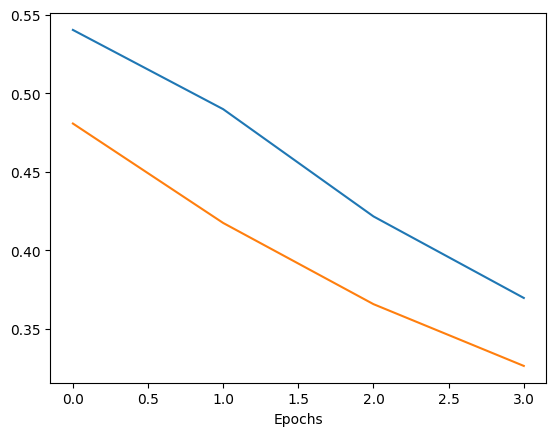

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(loss_train[1:])
plt.plot(loss_eval[1:])
plt.xlabel('Epochs')
plt.show()

In [ ]:
import sklearn.metrics as metrics

In [ ]:
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
model.eval()
lres = []
ytrue = []
with torch.no_grad():
    for data,target in dl_test:
        data = data.to(device)
        pred = model(data)
        res  = pred.argmax(dim=1).cpu().tolist()
        lres += res
        ytrue += target

In [ ]:
metrics.confusion_matrix(ytrue,lres)

array([[17,  0],
       [ 0, 20]])

In [ ]:
metrics.accuracy_score(ytrue,lres)

1.0

In [ ]:
metrics.precision_score(ytrue,lres)

1.0

In [ ]:
metrics.recall_score(ytrue,lres)

1.0

In [ ]:
metrics.f1_score(ytrue,lres)

1.0

In [ ]:
print(metrics.classification_report(ytrue,lres))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        20

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



###IMPORTANDO UMA IMAGEM PARA TESTAR O MODELO

In [ ]:
image_loader = lambda x: Image.open(x).convert("RGB")

In [ ]:
img2 = image_loader('./macajpg/maca.jpg')

In [ ]:
img = image_loader('./bananajpn/IMG_4912.jpg')

In [ ]:
x = transform(img)

In [ ]:
y = transform(img2)

In [ ]:
x = x.view(1,3,224,224)

In [ ]:
y = y.view(1,3, 224, 224)

In [ ]:
x = x.to(device)

In [ ]:
y = y.to(device)

In [ ]:
pred = model(x)

In [ ]:
pred2 = model(y)

In [ ]:
pred

tensor([[ 0.5345, -0.0073]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
pred2

tensor([[-0.6115,  0.3526]], device='cuda:0', grad_fn=<AddmmBackward0>)

###FAZENDO UM TESTE NO MODELO

In [ ]:
previsao = model(x)
classe_predita = torch.argmax(previsao, dim=1)
if classe_predita.item() == 1:
  print("A imagem é uma maçã.")
else:
  print("A imagem é uma banana.")

A imagem é uma banana.


###CRIANDO O BOT DO TELEGRAM

In [ ]:
!pip install telebot

In [ ]:
import telebot
from PIL import Image
import io
import torch

# Insira o token do seu bot
TOKEN = "7833060106:AAEq7kIBS6NhW78bfuX1YlbhQ3Ugt-OjiUg"
bot = telebot.TeleBot(TOKEN)

# Variável global para armazenar a imagem
stored_image = None

@bot.message_handler(commands=['start'])
def start(message):
    bot.reply_to(message, "Envie-me uma imagem para que eu a armazene.")

@bot.message_handler(content_types=['photo'])
def handle_photo(message):
    global stored_image

    # Obtém o ID do arquivo da foto em alta resolução
    file_id = message.photo[-1].file_id

    # Baixa o arquivo da foto
    file_info = bot.get_file(file_id)
    downloaded_file = bot.download_file(file_info.file_path)

    # Armazena a imagem em uma variável usando Pillow
    stored_image = Image.open(io.BytesIO(downloaded_file))

    # Transformação e classificação
    x = transform(stored_image).view(1, 3, 224, 224).to(device)
    previsao = model(x)
    classe_predita = torch.argmax(previsao, dim=1)

    if classe_predita.item() == 1:
        bot.reply_to(message, "Maçã!")
    elif classe_predita.item() == 0:
        bot.reply_to(message, "Banana!")
    else:
        bot.reply_to(message, "ERRO")

@bot.message_handler(commands=['get_image'])
def get_stored_image(message):
    if stored_image:
        bot.reply_to(message, "A imagem foi armazenada.")
    else:
        bot.reply_to(message, "Nenhuma imagem foi armazenada ainda.")

bot.polling()

In [ ]:
from google.colab import files

# Salva um arquivo local no Colab
with open("meuarquivo.txt", "w") as f:
    f.write("Este é o conteúdo do meu arquivo.")

# Faz o download diretamente
files.download("meuarquivo.txt")